In [37]:
import matplotlib.pyplot as plt
import random
import math
import sys
import matplotlib as mpl
from bioservices import UniProt # pip install bioservices // conda install bioservices

In [38]:
# Diccionario con los aminoácidos y sus correspondientes valores de variación de energía libre.

aa_deltaG = { 'A': 1,   # Alanine
             'C': 0.17,  # Cysteine
             'D': -3,    # Aspartic Acid
             'E': -2.6,  # Glutamic Acid
             'F': 2.5,   # Phenylalanine
             'G': 0.67,  # Glycine
             'H': -1.7,  # Histidine
             'I': 3.1,   # Isoleucine
             'K': -4.6,  # Lysine
             'L': 2.2,   # Leucine
             'M': 1.1,   # Methionine
             'N': -2.7,  # Asparagine
             'P': -0.29, # Proline
             'Q': -2.9,  # Glutamine
             'R': -7.5,  # Arginine
             'S': -1.1,  # Serine
             'T': -0.75, # Threonine
             'V': 2.3,   # Valine
             'W': 1.5,   # Tryptophan
             'Y': 0.08 } # Tyrosine

In [39]:
#==============#
#  Problema 1  #
#==============#

# inputs:
#   protein = "ACDEF..."      (lista de aminoácidos)
#   estructura = "INSWWE"     (formato de estructura 2d)
# output: 
#   diccionario donde las claves son los puntos 2d donde se encuentra el aminoácido del valor.
#   Ej: (0,0)="A", (0,1)="B"...
# Asumimos que protein y structure tienen la misma longitud y solo se puede hacer un movimiento por proteína.

def get_spatial_dic(protein, structure) -> dict: 
    
    #Inicializamos el diccionario que devolveremos si no hay solapamientos.
    res = dict()
    
    #Las coordenadas por defecto de inicio son (x,y) = 0,0.
    afterCords= [0,0]
    
    #Recorremos la cadena de aminoácidos
    for i in range (0,len(protein)):
        
        #Si el aminoácido está en delta entonces y su estructura asociada es "I" seguimos, en el caso de que no, paramos.
        if(protein[i] in aa_deltaG):
            if(i==0 and structure[i]!="I"):
                return dict()
            
            #Si la estructura del aminoácido es la I, como es el caso inicial suponemos que está en 0,0.
            if(structure[i] == "I"):
                res[(0,0)]=protein[i]
                
            #En cualquier otro caso
            else:
                
                #Si la estructura asociada es una "N", obtenemos las coordenadas del anterior y le sumamos 1 a la componente "y".
                if(structure[i]=="N"):
                    afterCords= [afterCords[0],afterCords[1]+1]
                    newCords = tuple(afterCords)
                
                #Si la estructura asociada es una "S", obtenemos las coordenadas del anterior y le restamos 1 a la componente "y"
                elif(structure[i]=="S"):
                    afterCords= [afterCords[0],afterCords[1]-1]
                    newCords = tuple(afterCords)
                    
                #Si la estructura asociada es una "E", obtenemos las coordenadas del anterior y le sumamos 1 a la componente "x"
                elif(structure[i]=="E"):
                    afterCords= [afterCords[0]+1,afterCords[1]]
                    newCords = tuple(afterCords)
                
                #Si la estructura asociada es una "W", obtenemos las coordenadas del anterior y le restamos 1 a la componente "x"
                elif(structure[i]=="W"):
                    afterCords= [afterCords[0]-1,afterCords[1]]
                    newCords = tuple(afterCords)
                    
                #En el caso de que las nuevas coordenadas no estén el diccionario las añadimos, en el caso de que estén,
                #Significa que existe solapamiento, por tanto devolvemos uno vacío
                if(newCords not in res):
                    res[newCords]=protein[i]
                else:
                    return dict()
        else:
            return dict()
    return res

        

In [40]:
get_spatial_dic("ACDEF","IWNNN")

{(0, 0): 'A', (-1, 0): 'C', (-1, 1): 'D', (-1, 2): 'E', (-1, 3): 'F'}

In [41]:
#==============#
# Problema 2.1 #
#==============#

# input: 
#   aa (aminoácido) 
#   Ej: "A", "C", "D",
# output: 
#   True (hidrofóbico) o False (hidrofílico)

def is_hydrophobic(aa) -> bool:
    hydrophobic_limit = -1.5

    return aa_deltaG[aa] > hydrophobic_limit

In [42]:
print(is_hydrophobic('A'))
print(is_hydrophobic('D'))
print(is_hydrophobic('S'))        

True
False
True


In [43]:
#==============#
# Problema 2.2 #
#==============#

# inputs:
#   dic = "{(0, 0): 'A', (0, 1): 'D', ...}"      (diccionario con las coordenadas y el aminoácido)
#   coords = "(0,0)"     (coordenadas)
# output: 
#   Número de posiciones adyacentes libres.
#   Ej: 3

def get_N(dic, coords) -> int:
    res = 0
    x = coords[0]
    y = coords[1]
    if ((x+1, y) not in dic):
        res+=1
    if ((x, y+1) not in dic):
        res+=1
    if ((x-1, y) not in dic):
        res+=1
    if ((x, y-1) not in dic):
        res+=1
    return res

# input: 
#   dic   (diccionario que representa la estructura 2d de la proteína)
#   Ej: {(0,0): A, (0,1): D ... }
# output: 
#   score (puntuación otorgada a dicha estructura)

def get_score(dic) -> dict:
    res = 0
    for coords in dic:
        
        aminoacid = dic[coords]
        free_pos = get_N(dic,coords)
        
        res += aa_deltaG[aminoacid] * free_pos
        if is_hydrophobic(aminoacid):
            res += 10 * free_pos
    return res

In [44]:
get_score({(0,0): "A", (0,1): "D"})

24

In [45]:
#==============#
#  Problema 3  #
#==============#

# input: 
#   strcture   (cadena que representa la estructura 2d de la proteína)
#   Ej: "INNNSWN"
# output: 
#   coords (lista que contiene las coordenadas de cada aminoácido de la proteína en orden)

def get_coords(structure) -> list:
    afterCords= (0,0)
    coords = list()
    coords.append(afterCords)
    
    # Iteramos por todos los componentes de la estructura
    for i in range (1,len(structure)):
        
        #Si la estructura asociada es una "N", obtenemos las coordenadas del anterior y le sumamos 1 a la componente "y"
        if(structure[i]=="N"):
            afterCords= [afterCords[0],afterCords[1]+1]
            newCords = tuple(afterCords)

        #Si la estructura asociada es una "S", obtenemos las coordenadas del anterior y le restamos 1 a la componente "y"
        elif(structure[i]=="S"):
            afterCords= [afterCords[0],afterCords[1]-1]
            newCords = tuple(afterCords)

        #Si la estructura asociada es una "E", obtenemos las coordenadas del anterior y le sumamos 1 a la componente "x"
        elif(structure[i]=="E"):
            afterCords= [afterCords[0]+1,afterCords[1]]
            newCords = tuple(afterCords)

        #Si la estructura asociada es una "W", obtenemos las coordenadas del anterior y le restamos 1 a la componente "x"
        elif(structure[i]=="W"):
            afterCords= [afterCords[0]-1,afterCords[1]]
            newCords = tuple(afterCords)
        coords.append(newCords)
    return coords

# devuelve la dirección al doblar hacia atrás

def fold_backwards(direction) -> str:
    if direction == "N":
        return "W"
    elif direction == "W":
        return "S"
    elif direction == "S":
        return "E"
    elif direction == "E":
        return "N"
    else:
        return direction
    
# devuelve la dirección al doblar hacia a delante
    
def fold_forwards(direction) -> str:
    if direction == "N":
        return "E"
    elif direction == "W":
        return "N"
    elif direction == "S":
        return "W"
    elif direction == "E":
        return "S"
    else:
        return direction

# input: 
#   strcture   (cadena que representa la estructura 2d de la proteína)
#   Ej: "INNNSWN"
#
#   pos     (punto desde el que se dobla la proteína)
#   Ej: (0,1)
#
#   angle   (ángulo con el que se dobla)
#   90 o -90
# output: 
#   coords (lista que contiene las coordenadas de cada aminoácido de la proteína en orden)
    
def fold(structure, pos, angle) -> str:
    coords = get_coords(structure)
    
    res = ""
    folding = False
    for i in range(0, len(coords)):
        coord = coords[i]
        direction = structure[i]
        
        if folding:
            if angle == 90:
                res += fold_backwards(direction)
            if angle == -90:
                res += fold_forwards(direction)
        else:
            res+= direction
            
        if coord == pos:
            folding = True
            
    return res        

In [46]:
fold("INNW", (0,1), 90)

'INWS'

In [47]:
fold("INNW", (0,1), -90)

'INEN'

In [48]:
#================#
#  Problema 3.2  #
#================#

# input: 
#   protein    (lista de aminoácidos)
#   Ej: "ACDEF..."
#
#   structure   (cadena que representa la estructura 2d de la proteína)
#   Ej: "INNNSWN..."
# output: 
#   successors (diccionario cuyas claves son todas las posibles estructuras válidas tras
#                aplicar todos los posibles plegamientos y cuyos valores sean los correspondientes diccionarios
#                espaciales obtenidos con get_spatial_dic)

def get_successors(protein, structure) -> dict:
    coords = get_coords(structure)
    
    if len(protein) != len(structure):
        return {}
    
    res = {}
    for coord in coords:
        folded_backwards = fold(structure, coord, 90)
        folded_forwards = fold(structure, coord, -90)
        
        backwards_dic = get_spatial_dic(protein, folded_backwards)
        forwards_dic = get_spatial_dic(protein, folded_forwards)
        
        if backwards_dic:
            res[folded_backwards] = backwards_dic
            
        if forwards_dic:
            res[folded_forwards] = forwards_dic
            
    return res

In [49]:
protein = ['L','K','H','R']
structure = ['I','E','E','E']
res = get_successors(protein,structure)
print(res)

{'INNN': {(0, 0): 'L', (0, 1): 'K', (0, 2): 'H', (0, 3): 'R'}, 'ISSS': {(0, 0): 'L', (0, -1): 'K', (0, -2): 'H', (0, -3): 'R'}, 'IENN': {(0, 0): 'L', (1, 0): 'K', (1, 1): 'H', (1, 2): 'R'}, 'IESS': {(0, 0): 'L', (1, 0): 'K', (1, -1): 'H', (1, -2): 'R'}, 'IEEN': {(0, 0): 'L', (1, 0): 'K', (2, 0): 'H', (2, 1): 'R'}, 'IEES': {(0, 0): 'L', (1, 0): 'K', (2, 0): 'H', (2, -1): 'R'}, 'IEEE': {(0, 0): 'L', (1, 0): 'K', (2, 0): 'H', (3, 0): 'R'}}


In [50]:
get_successors("ADADDDD", "INWSWNE")

{'INWSSWN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-1, -1): 'D',
  (-2, -1): 'D',
  (-2, 0): 'D'},
 'INWSWWN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-2, 0): 'D',
  (-3, 0): 'D',
  (-3, 1): 'D'},
 'INWSWNN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-2, 0): 'D',
  (-2, 1): 'D',
  (-2, 2): 'D'}}

In [51]:
#================#
#  Problema 4    #
#================#

# Esta función aplica el algoritmo de recocido simulado al plegamiento de una proteína.
# La proteína es indicada como una cadena con sus aminoácidos.
# Durante la ejecución del algoritmo se van immprimiendo en consola los valores de temperatura y puntuación actuales
# Finalmente se devuelve la estructura óptima obtenida por el algoritmo.
#
# input: 
#   protein    (lista de aminoácidos)
#   Ej: "ACDEF..."
#
# output
#   structure   (cadena que representa la estructura 2d de la proteína)
#   Ej: "INNNSWN..."

def simmulating_annealing(protein) -> str:
    T_0 = 100
    L = 150
    T_f = 0.001
    
    T = T_0
    actual_structure = "I" + "N" * (len(protein) - 1)
    actual_score = 0
    
    while T >= T_f:
        
        for i in range(1,L+1):
            candidate_structure_dic = get_successors(protein, actual_structure)
            x = random.randint(0, len(candidate_structure_dic)-1)
            keys = list(candidate_structure_dic.keys())
            candidate_structure = keys[x]
            
            candidate_dic = get_spatial_dic(protein, candidate_structure)
            actual_dic = get_spatial_dic(protein, actual_structure)
            actual_score = get_score(actual_dic)
            candidate_score = get_score(candidate_dic)
            delta = candidate_score - actual_score
            
            if random.random() < math.pow(math.e, -delta/T) or delta < 0:
                actual_structure = candidate_structure
        
        print("Score: " + str(actual_score))
        print("Temperature: " + str(T))
        T = T / 2
        
    return actual_structure

In [52]:
#================#
#  Problema 5.2  #
#================#

# input: 
#   spatial_dic    (diccionario donde las claves son los puntos 2d donde se encuentra el aminoácido del valor)
#
# output
#   sorted_dicc   (diccionario con claves "hidrophobic" e "hidrphilic", y 
#                  cuyos valores son listas que contienen todas las coordenadas de los aminoácidos
#                  ordenados si son hidrofóbicos o no)

def sort_hidrophobic_coords(spatial_dic) -> dict:
    res = {"hydrophobic": [], "hydrophilic": []}
    
    for coord in spatial_dic:
        aminoacid = spatial_dic[coord]
        
        if is_hydrophobic(aminoacid):
            res["hydrophobic"].append(coord)
        else:
            res["hydrophilic"].append(coord)
        
    return res


# Función que genera un gráfico 2d de structura de la proteína, marcando los aminoácidos y si son o no hidrofóbicos
#
# input: 
#   spatial_dic    (diccionario donde las claves son los puntos 2d donde se encuentra el aminoácido del valor)

def draw_protein(spatial_dic) -> None:
    coords = spatial_dic.keys()
    coords_sorted = sort_hidrophobic_coords(spatial_dic)

    fig = plt.figure(figsize=(8, 8))
    
    # LINES
    x, y = zip(*coords)
    plt.plot(x, y, "grey", zorder=0)
    
    x_diff = abs( min(x) - max(x) )
    y_diff = abs( min(y) - max(y) )
    thickness = max(x_diff, y_diff)**(-1) * 3500
    
    # HIDROPHOBIC
    x_1, y_1 = zip(*coords_sorted["hydrophobic"])
    plt.scatter(x_1, y_1, thickness, color="#FF6F82", label="hidrophobic")
    
    # HIDROPHILIC
    x_2, y_2 = zip(*coords_sorted["hydrophilic"])
    plt.scatter(x_2, y_2, thickness, color="#4ED1FF", label="hidrophilic")
    
    # LETTERS

    
    x_shift = 0.01 * x_diff
    y_shift = 0.01 * y_diff
    for coord in coords:
        aminoacid = spatial_dic[coord]
        
        x = coord[0] - x_shift
        y = coord[1] - y_shift
        plt.annotate(aminoacid, xy=(x,y), xytext=(x,y))

    plt.axis("equal")
    plt.legend()
    plt.show()

In [53]:
spatial_dic = get_spatial_dic("ACDEAF","INNWSW")
sort_hidrophobic_coords(spatial_dic)

{'hydrophobic': [(0, 0), (0, 1), (-1, 1), (-2, 1)],
 'hydrophilic': [(0, 2), (-1, 2)]}

{(0, 0): 'A', (0, 1): 'C', (0, 2): 'D', (-1, 2): 'E', (-1, 1): 'A', (-2, 1): 'F', (-2, 2): 'S', (-2, 3): 'D', (-2, 4): 'S', (-1, 4): 'G', (0, 4): 'F', (0, 5): 'L', (1, 5): 'K', (1, 4): 'Q', (2, 4): 'A'}


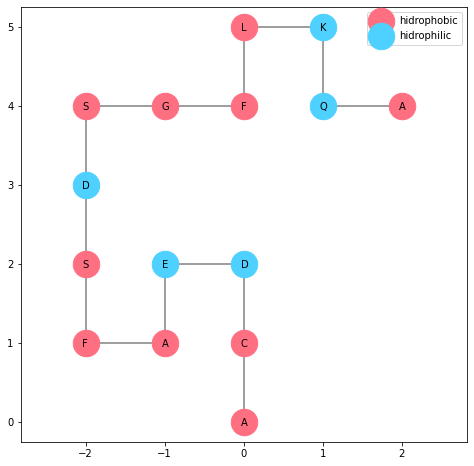

In [54]:
spatial_dic = get_spatial_dic("ACDEAFSDSGFLKQA",
                              "INNWSWNNNEENESE")
print(spatial_dic)
draw_protein(spatial_dic)

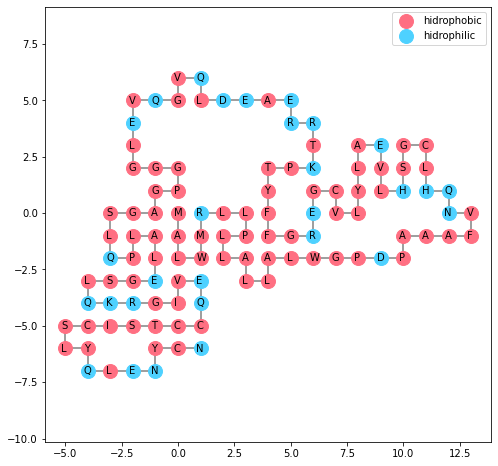

In [55]:
spatial_dic = get_spatial_dic("MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN",
                              "ISSENNEESWSESENEEEEEENEEENWNWNNWSSWNNWSSSWNWSSWWNNNEENNWNWWWWNWSWWSSSEESWSWWSSENESSWWWSEEEENESSWWWWWWSESEEENEE")
draw_protein(spatial_dic)

In [56]:
#================#
#  Problema 5.3  #
#================#

def get_value_aaDelta(lista) -> list:
    res = []
    for i in lista:
        res.append(aa_deltaG[i])
    return res

def get_min_color(spatial_list) -> int:
    res = sys.maxsize
    for element in spatial_list:
        if(aa_deltaG[element]<res):
            res=aa_deltaG[element]
    return res

            
def get_max_color(spatial_list) -> int:
    res = -sys.maxsize
    for element in spatial_list:
        if(aa_deltaG[element]>res):
            res=aa_deltaG[element]
    return res

# Función que genera un gráfico 2d de structura de la proteína, marcando los aminoácidos y 
# coloreando cada uno con un gradiente según su valor de energía libre.
#
# input: 
#   spatial_dic    (diccionario donde las claves son los puntos 2d donde se encuentra el aminoácido del valor)

def draw_protein_with_gradient(spatial_dic) -> None:
    coords = spatial_dic.keys()
    coords_sorted = sort_hidrophobic_coords(spatial_dic)
    spatial_list = (list(spatial_dic.values()))
    
    minNum = get_min_color(spatial_list)
    maxNum = get_max_color(spatial_list)
    
    fig = plt.figure(figsize=(8, 10))
    
    # LINES
    color_map = mpl.cm.cool
    normalizer = mpl.colors.Normalize(vmin = minNum, vmax = maxNum)

    x, y = zip(*coords)
    plt.plot(x, y, "grey", zorder=0)
    
    x_diff = abs( min(x) - max(x) )
    y_diff = abs( min(y) - max(y) )
    thickness = max(x_diff, y_diff)**(-1) * 3500
    
    # HIDROPHOBIC
    x_1, y_1 = zip(*coords)
    valores = get_value_aaDelta(spatial_dic.values())
    restest=[]
    for i in valores:
        val = normalizer(i)
        restest.append(color_map(val))
    plt.scatter(x_1, y_1, thickness, cmap=color_map, color = restest)
    
    # LETTERS
    x_shift = 0.01 * x_diff
    y_shift = 0.01 * y_diff
    for coord in coords:
        aminoacid = spatial_dic[coord]
        
        x = coord[0] - x_shift
        y = coord[1] - y_shift
        plt.annotate(aminoacid, xy=(x,y), xytext=(x,y))
       
    cmap = mpl.cm.ScalarMappable(norm = normalizer ,
               cmap = color_map)
    cmap._A = []   #https://stackoverflow.com/questions/28801803/matplotlib-scalarmappable-why-need-to-set-array-if-norm-set
    fig.colorbar(cmap, orientation ='horizontal', label ='Gradiente basado en valores de energía libre')
    
    plt.axis("equal")
    plt.show()
    

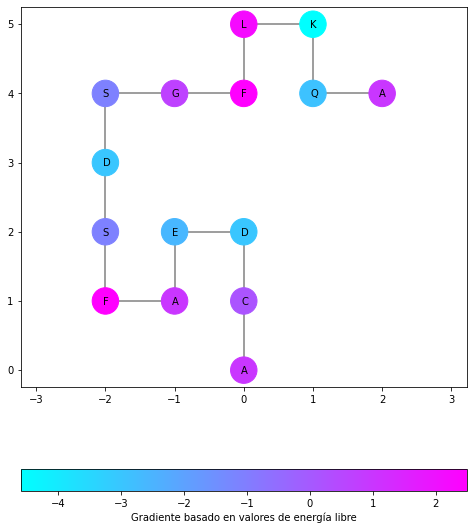

In [57]:
spatial_dic = get_spatial_dic("ACDEAFSDSGFLKQA",
                              "INNWSWNNNEENESE")
draw_protein_with_gradient(spatial_dic)

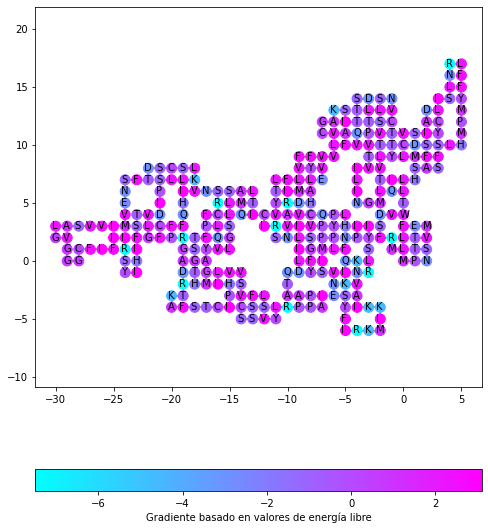

In [58]:
spatial_dic = get_spatial_dic("MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV",
                              "IEENWNENWWSSWNWNNEENNWNEENEENWWWWWSSSSWWNNNENNEEEEEEEENNNNNNNWSSSWSWSESWWWWWWNEENNWSWNWSSWNWSWSEEESWWSWWWSEESWWWWSEEESWWWSEEEEEESWWWWWSWNWNWWNENWWSSSSSWWSSSWNNNNEENWNENNWWWSSSWWNNNNEEENWWWWSWWSSSSWWWWWWSESSENEEENESSSENNNNNESSEEESSSSSWSEEEEENNWNEESSEESWWSEEENEEEENWWWNNENNNESSSENNNESENENESSSSWNWSSESSEESSWWWNNNWNN")
draw_protein_with_gradient(spatial_dic)

In [ ]:
# Esta función es una versión idéntica a la anterior.
# La única diferencia es que se ha añadido un sistema de cortafuegos para evitar que el algoritmo
# se mantenga muchos enfriamiento sin un cambio significativo en la puntuación obtenida.
# Además, imprime en pantalla dos gráficos que permiten ver la evolución de los valores
# de temperatura y puntuación a lo largo de la ejecución del algoritmo.

def simmulating_annealing_with_graphs(protein) -> str:
    T_0 = 100
    L = 150
    T_f = 0.001
    
    T = T_0
    actual_structure = "I" + "N" * (len(protein) - 1)
    actual_score = 0
    
    #FIREWALL
    last_score = 0
    same_score_iterations = 0 
    
    #GRAPH
    plt_score_it = 0
    plt_temp_it = 1
    plt_score = []
    plt_temp = [T_0]
    
    while T >= T_f:
        
        for i in range(1,L+1):
            
            candidate_structure_dic = get_successors(protein, actual_structure)
            x = random.randint(0, len(candidate_structure_dic)-1)
            keys = list(candidate_structure_dic.keys())
            candidate_structure = keys[x]
            
            candidate_dic = get_spatial_dic(protein, candidate_structure)
            actual_dic = get_spatial_dic(protein, actual_structure)
            actual_score = get_score(actual_dic)
            candidate_score = get_score(candidate_dic)
            delta = candidate_score - actual_score
            
            if random.random() < math.pow(math.e, -delta/T) or delta < 0:
                actual_structure = candidate_structure
            
            #FIREWALL
            if last_score-2 < actual_score or actual_score > last_score+2:
                same_score_iterations += 1
            else:
                same_score_iterations = 0
            # break
            if same_score_iterations > L:
                T = T_f
                
            last_score = actual_score
            
            #GRAPH
            plt_score.append(actual_score)
            plt_score_it+=1
            
        print("Score: " + str(actual_score))
        print("Temperature: " + str(T))
        T = T / 2
        
        #GRAPH
        plt_temp.append(T)
        plt_temp_it+=1
    
    #GRAPH
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,7))
    ax1.title.set_text("Score")
    ax1.plot(range(0, plt_score_it) , plt_score, "blue")
    ax2.title.set_text("Temperature")
    ax2.plot(range(0, plt_temp_it), plt_temp, "orange")
    
    return actual_structure

In [ ]:
# Ejemplo 1

#  ("ACDEAFSDSGFLKQA", "INNWSWNNNEENESE")

structure = simmulating_annealing_with_graphs("ACDEAFSDSGFLKQA")
print(structure)

spatial_dic = get_spatial_dic("ACDEAFSDSGFLKQA",
                              structure)
print(spatial_dic)
draw_protein(spatial_dic)

In [ ]:
# Ejemplo 2

insulin = 'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'

structure = simmulating_annealing_with_graphs(insulin)
print(structure)

spatial_dic = get_spatial_dic(insulin,
                              structure)

draw_protein(spatial_dic)

In [36]:
#================#
#  Problema 5.1  #
#================#


# A continuación se usa el servicio de "Uniprot", importado del módulo "bioservices",
# para hacer una consulta sobre 4 proteínas de distintos tamaños y aplicarles el algoritmo implementado.

service = UniProt()
queries = ["HUNIN_HUMAN", "3SX1_OPHHA", "BEX1_RAT", "CFA20_DROME"]


for query in queries:
    
    protein = service.get_fasta_sequence(query)

    print("===========================================\n\n")
    print("PROTEIN: \n" + protein)
    print("===========================================\n\n")
    
    print("SIMMULATING ANNEALING:\n")
    print("===========================================\n\n")
    
    structure = simmulating_annealing_with_graphs(protein)
    
    print("RESULT:\n")
    print(structure)

    spatial_dic = get_spatial_dic(protein,
                              structure)
    draw_protein(spatial_dic)




PROTEIN: 
MAPRGFSCLLLLTSEIDLPVKRRA


SIMMULATING ANNEALING:





TypeError: f() takes 1 positional argument but 2 were given